In [1]:
# ARIMA Model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas.plotting import lag_plot
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('NVDA.csv')
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Date']

0      2010-10-25
1      2010-10-26
2      2010-10-27
3      2010-10-28
4      2010-10-29
          ...    
3015   2022-10-17
3016   2022-10-18
3017   2022-10-19
3018   2022-10-20
3019   2022-10-21
Name: Date, Length: 3020, dtype: datetime64[ns]

Text(0.5, 1.0, 'NVDA Stock - Autocorrelation plot with lag = 3')

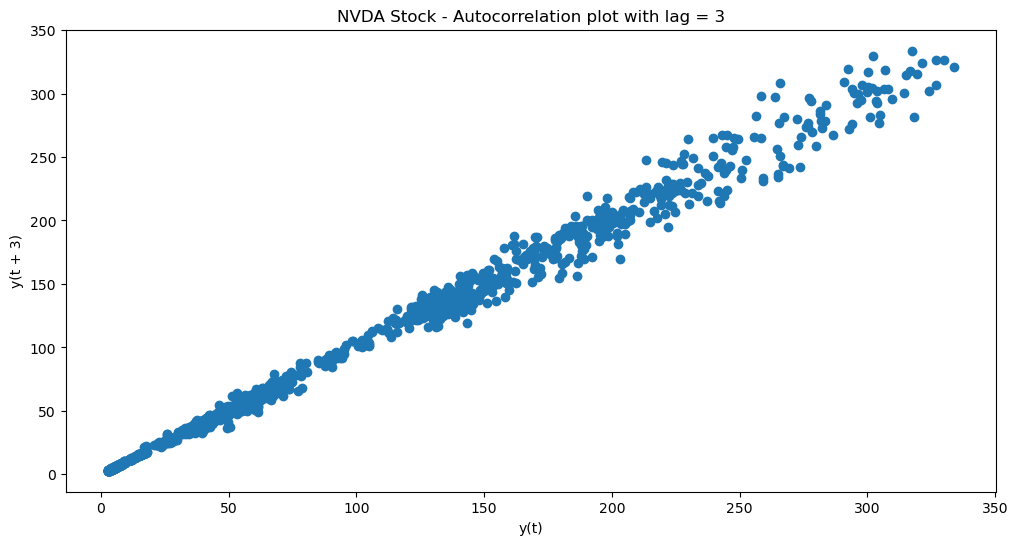

In [4]:
plt.figure(figsize=(12,6))
lag_plot(df['Close'], lag=3)
plt.title('NVDA Stock - Autocorrelation plot with lag = 3')

Text(0, 0.5, 'Price')

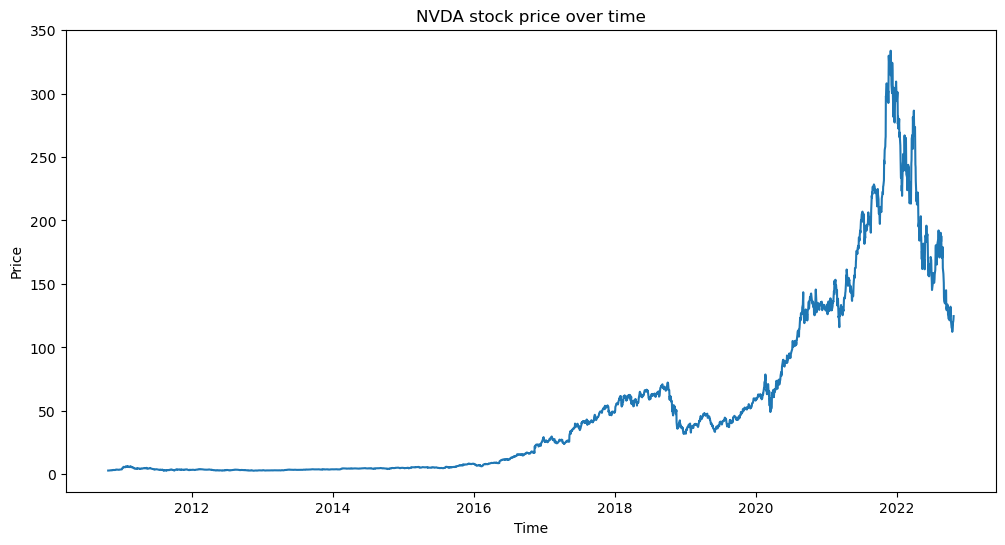

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df["Close"])
plt.title("NVDA stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")

In [6]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = train_data['Close'].tolist()
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [7]:
RMSE_error = (mean_squared_error(test_data, model_predictions) ** 0.5)
print(f'Testing Mean Squared Error is {RMSE_error}')

Testing Mean Squared Error is 5.368467578990442


In [8]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3019
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -7561.754
Date:                Sun, 23 Oct 2022   AIC                          15133.509
Time:                        22:59:32   BIC                          15163.571
Sample:                             0   HQIC                         15144.319
                               - 3019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0480      0.007     -6.419      0.000      -0.063      -0.033
ar.L2         -0.0273      0.006     -4.476      0.000      -0.039      -0.015
ar.L3          0.0239      0.007      3.192      0.001       0.009       0.039
ar.L4         -0.0234      0.006     -4.010      0.000      -0.035      -0.012
sigma2         8.7866      0.068    128.750      0.000       8.653       8.920
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             54357.86
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):            2764.15   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
date_lst = df["Date"].tolist()
date_last = date_lst[-1]
for i in range(1,11):
    date_last = date_last + timedelta(days = 1)
    date_lst.append(date_last)

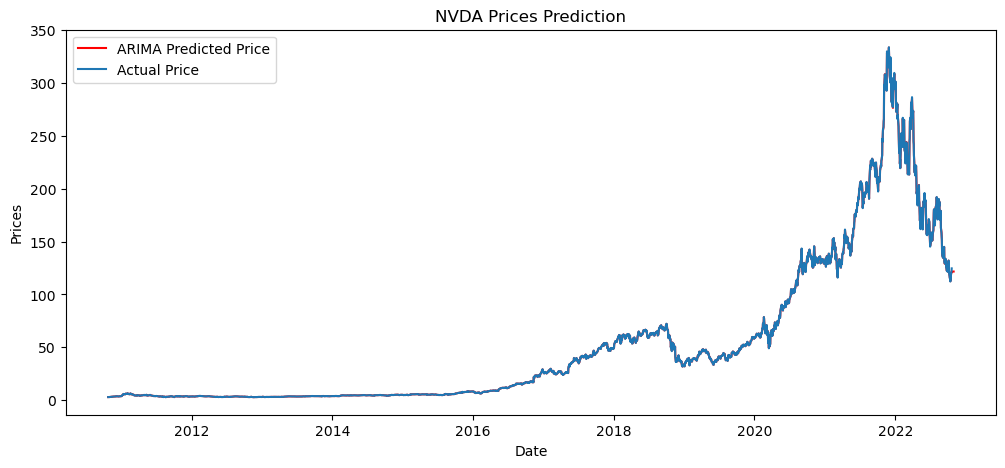

In [55]:
test_set_range = df[int(len(df)*0.0):].index
forecast_data = model_fit.predict(1, len(df)+10, typ='levels')
plt.figure(figsize=(12,5))
plt.plot(date_lst,forecast_data, color='red',label='ARIMA Predicted Price')
plt.plot(df["Date"], df["Close"], label='Actual Price')
plt.title('NVDA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc=2)

C:\Users\Daniel\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if sys.path[0] == "":


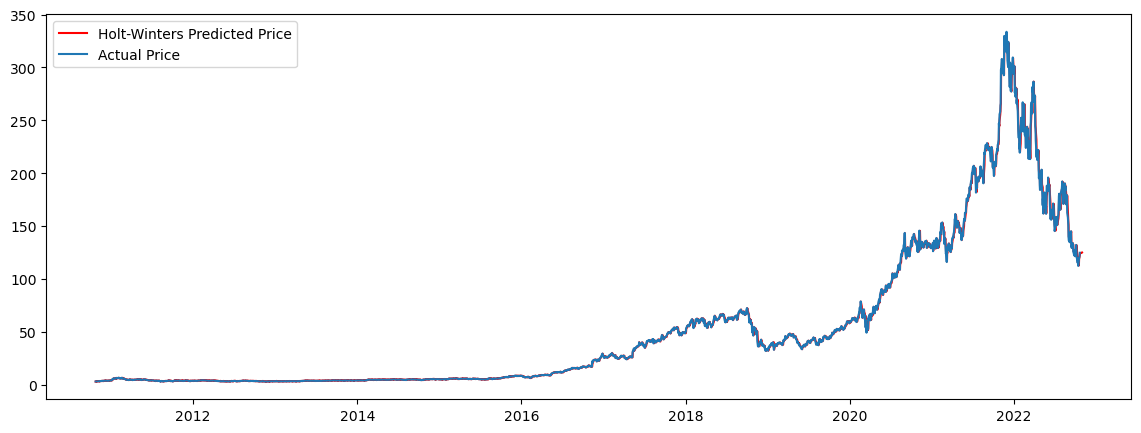

In [60]:
#Holts winters method
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

train_data3, test_data3 = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data3 = train_data3['Close'].values
test_data3 = test_data3['Close'].values

train_data2 = df[0:int(len(df))]
training_data2 = train_data2['Close'].values

model = ExponentialSmoothing(training_data2, trend='add',seasonal = "add", seasonal_periods = 10, damped=False)
hw_model = model.fit(optimized=True, remove_bias=False)
pred_data1 = hw_model.predict(2114, 3019)
pred_data2 = hw_model.predict(0, 3029)

plt.figure(figsize = (14,5))

# plt.plot(training_data2, label='Train')
# plt.plot(testing_data2, label='Test')
plt.plot(date_lst, pred_data2, color='red', label='Holt-Winters Predicted Price')
plt.plot(df["Date"], df["Close"], label='Actual Price')
plt.legend(loc='best')

In [61]:
RMSE_error = (mean_squared_error(test_data3, pred_data1) ** 0.5)
RMSE_error
#High RSME error suggests model is inaccurate

5.297758868435159

In [57]:

finalprices = pred_data2[int(3020):].tolist()

newdf = pd.DataFrame(columns=['Date'])

newdf['Close'] = finalprices

newdf.head()
newdf.to_csv(r'C:\Users\Daniel\Downloads\University\FINTECH\Untitled Folder\Untitled Folder\NVDAARIMA.csv', index = False, header=True)
